# Importing and Installing Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow

In [ ]:
tensorflow.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import keras
import shap
from numpy import dstack
from sklearn.utils import class_weight
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical

# Read Data

In [ ]:
X=pd.read_csv('/content/drive/MyDrive/IP/data.csv',index_col=0)
onehotlabels=pd.read_csv('/content/drive/MyDrive/IP/labels.csv')

In [ ]:
feat = X.columns

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, onehotlabels, train_size=0.8, random_state=50)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, train_size=0.9, random_state=50)

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [ ]:
# Reshaping the Data to feed it to the model
X_train=X_train.reshape(-1, 76, 1)
X_val = X_val.reshape(-1, 76, 1)
X_test = X_test.reshape((-1, 76, 1))

In [ ]:
y_train=y_train.iloc[:,1:]
y_test=y_test.iloc[:,1:]
y_val = y_val.iloc[:,1:]

# CNN Model 

In [ ]:
cnn = keras.models.load_model('/content/drive/MyDrive/IP/model_cnn')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### DeepExplainer: CNN

In [ ]:
background = X_train[np.random.choice(X_train.shape[0], 4000, replace=False)]
#print(background)
# DeepExplainer to explain predictions of the model
explainer_cnn = shap.DeepExplainer(cnn, background)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.



In [ ]:
shap_values_cnn = explainer_cnn.shap_values(X_test[:5])

In [ ]:
num_runs = 5
shap_values_cnn_list = []

for i in range(num_runs):
    shap_values_cnn = explainer_cnn.shap_values(X_test[:5])
    shap_values_cnn_list.append(shap_values_cnn)

In [ ]:
shap_values_cnn_avg = np.mean(shap_values_cnn_list, axis=0)


In [ ]:
len(shap_values_cnn_avg)

4

In [ ]:
shap_values_cnn[0]

In [ ]:
shap.initjs()
shap.force_plot(explainer_cnn.expected_value[0], shap_values_cnn_avg[0][0])

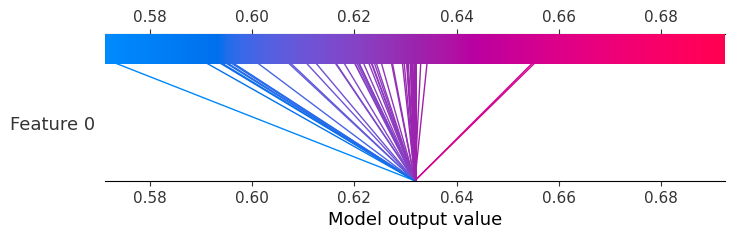

In [ ]:
shap.decision_plot(explainer_cnn.expected_value[0], 
                   shap_values_cnn_avg[0][0])

# Feature Importance Validation: CNN

In [ ]:
k=20

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_cnn_test = np.mean(np.abs(shap_values_cnn_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict = dict(zip(feat, np.abs(mean_abs_shap_values_cnn_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict = {k: v for k, v in sorted(feature_shap_dict.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_cnn = list(sorted_feature_shap_dict.keys())[:k]


In [ ]:
top_k_features_cnn

['FWD Init Win Bytes',
 'Packet Length Variance',
 'Bwd Header Length',
 'Bwd Packet Length Max',
 'Fwd Seg Size Min',
 'Bwd Bulk Rate Avg',
 'Packet Length Max',
 'Bwd IAT Min',
 'Fwd Header Length',
 'Bwd Segment Size Avg',
 'Average Packet Size',
 'ACK Flag Count',
 'Idle Mean',
 'Total Length of Bwd Packet',
 'Fwd Segment Size Avg',
 'PSH Flag Count',
 'Bwd IAT Total',
 'Bwd Packet/Bulk Avg',
 'Packet Length Mean',
 'Bwd Init Win Bytes']

In [ ]:
sorted_feature_shap_dict.values()

dict_values([array([0.60332259]), array([0.37596098]), array([0.34254914]), array([0.29439319]), array([0.20988912]), array([0.16873675]), array([0.12836262]), array([0.12525841]), array([0.12237946]), array([0.0933698]), array([0.09289225]), array([0.08801842]), array([0.06003116]), array([0.05341582]), array([0.03884433]), array([0.03475756]), array([0.03071063]), array([0.03047343]), array([0.02592306]), array([0.02102702]), array([0.01501362]), array([0.01461491]), array([0.01427431]), array([0.013448]), array([0.0132883]), array([0.0128073]), array([0.01168991]), array([0.01127509]), array([0.01101426]), array([0.00965501]), array([0.00886277]), array([0.00877184]), array([0.00843526]), array([0.00748008]), array([0.00700859]), array([0.00700545]), array([0.00667158]), array([0.00593299]), array([0.00572419]), array([0.0050774]), array([0.00495548]), array([0.00470068]), array([0.00457597]), array([0.00410493]), array([0.00409134]), array([0.00327144]), array([0.00263107]), array(

In [ ]:
# extract the values inside the arrays as a list
#feature_importances = [item for item in list(sorted_feature_shap_dict.values())[0][0] ]

In [ ]:
feature_importances=[]

for i in range(20):
  ft=list(sorted_feature_shap_dict.values())[i][0]
  feature_importances.append(ft)

In [ ]:
len(feature_importances)

20

In [ ]:
# Dict of features and Importance sorted from high to low
sorted_feature_shap_dict

{'FWD Init Win Bytes': array([0.60332259]),
 'Packet Length Variance': array([0.37596098]),
 'Bwd Header Length': array([0.34254914]),
 'Bwd Packet Length Max': array([0.29439319]),
 'Fwd Seg Size Min': array([0.20988912]),
 'Bwd Bulk Rate Avg': array([0.16873675]),
 'Packet Length Max': array([0.12836262]),
 'Bwd IAT Min': array([0.12525841]),
 'Fwd Header Length': array([0.12237946]),
 'Bwd Segment Size Avg': array([0.0933698]),
 'Average Packet Size': array([0.09289225]),
 'ACK Flag Count': array([0.08801842]),
 'Idle Mean': array([0.06003116]),
 'Total Length of Bwd Packet': array([0.05341582]),
 'Fwd Segment Size Avg': array([0.03884433]),
 'PSH Flag Count': array([0.03475756]),
 'Bwd IAT Total': array([0.03071063]),
 'Bwd Packet/Bulk Avg': array([0.03047343]),
 'Packet Length Mean': array([0.02592306]),
 'Bwd Init Win Bytes': array([0.02102702]),
 'Bwd Packet Length Mean': array([0.01501362]),
 'Fwd Packet Length Max': array([0.01461491]),
 'Bwd Packets/s': array([0.01427431]),
 

# Feature Importance Plot

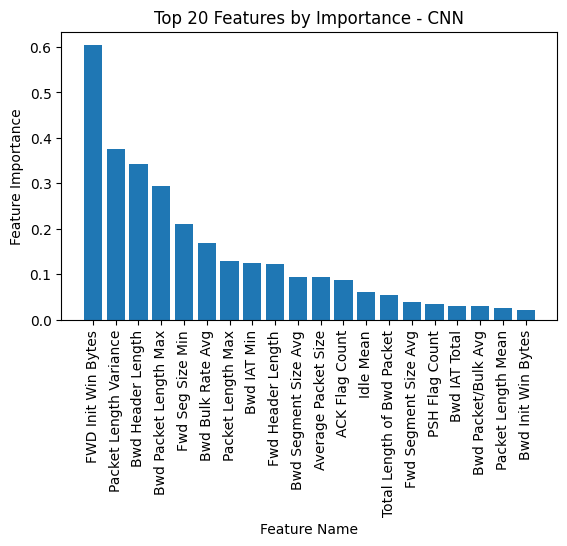

In [ ]:
import matplotlib.pyplot as plt

# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
feature_names = top_k_features_cnn
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(feature_names, feature_importances)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 20 Features by Importance - CNN')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()


## Train test split to validate CNN-SHAP

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cnn, X_te_cnn, y_tr_cnn, y_te_cnn = train_test_split( X[top_k_features_cnn] , onehotlabels, train_size=0.90, random_state=50)

## Random forest to validate feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cnn = RandomForestClassifier(n_estimators=50, max_depth=5)

rf_cnn.fit(X_tr_cnn, y_tr_cnn)

y_pred_rf_cnn = rf_cnn.predict(X_te_cnn)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_te_cnn, y_pred_rf_cnn))

# LSTM Model

In [ ]:
lstm = keras.models.load_model('/content/drive/MyDrive/IP/model_lstm')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### DeepExplainer: LSTM

In [ ]:
# background = X_train[np.random.choice(X_train.shape[0], 4000, replace=False)]
#print(background)
# DeepExplainer to explain predictions of the model
explainer_lstm = shap.DeepExplainer(lstm, background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values_lstm = explainer_lstm.shap_values(X_test[:5])

In [ ]:
num_runs = 5
shap_values_lstm_list = []

for i in range(num_runs):
    shap_values_lstm = explainer_lstm.shap_values(X_test[:5])
    shap_values_lstm_list.append(shap_values_lstm)

In [ ]:
shap_values_lstm_avg = np.mean(shap_values_lstm_list, axis=0)

In [ ]:
shap.initjs()
shap.force_plot(explainer_lstm.expected_value[0], shap_values_lstm_avg[0][0])

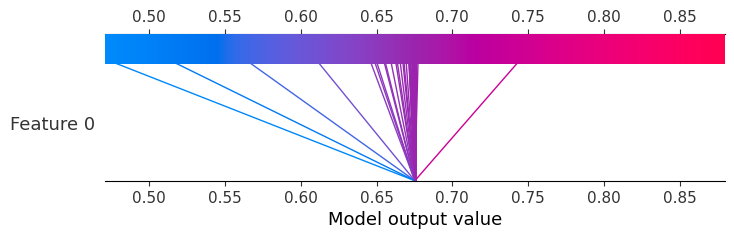

In [ ]:
shap.decision_plot(explainer_lstm.expected_value[0], 
                   shap_values_lstm_avg[0][0])

# Feature Importance: LSTM

In [ ]:
k=20

# Get the mean absolute SHAP values for each feature
mean_abs_shap_values_lstm_test = np.mean(np.abs(shap_values_lstm_avg[0]), axis=0)

# Create a dictionary where keys are the feature names and values are the absolute SHAP values
feature_shap_dict_lstm = dict(zip(feat, np.abs(mean_abs_shap_values_lstm_test)))

# Sort the dictionary by the absolute SHAP values
sorted_feature_shap_dict_lstm = {k: v for k, v in sorted(feature_shap_dict_lstm.items(), key=lambda item: item[1], reverse=True)}

# Get the top k features
top_k_features_lstm = list(sorted_feature_shap_dict_lstm.keys())[:k]


In [ ]:
top_k_features_lstm

['Fwd Seg Size Min',
 'Bwd Init Win Bytes',
 'FWD Init Win Bytes',
 'Bwd Segment Size Avg',
 'Subflow Bwd Bytes',
 'Bwd IAT Min',
 'Packet Length Variance',
 'Idle Std',
 'Idle Mean',
 'Fwd Act Data Pkts',
 'Idle Max',
 'Average Packet Size',
 'Fwd Segment Size Avg',
 'Subflow Fwd Bytes',
 'Bwd Packets/s',
 'Bwd Bulk Rate Avg',
 'PSH Flag Count',
 'Idle Min',
 'Packet Length Min',
 'Flow IAT Min']

In [ ]:
feature_importances_lstm=[]

for i in range(20):
  ft=list(sorted_feature_shap_dict_lstm.values())[i][0]
  feature_importances_lstm.append(ft)

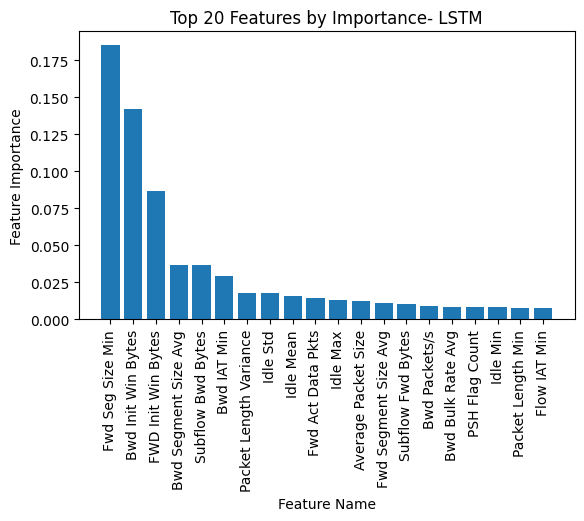

In [ ]:
# assume feature_names is a list of the top 5 feature names
# assume feature_importances is a list of the corresponding feature importance values
#feature_names = top_k_features_lstm
#feature_importances = list(sorted_feature_shap_dict.values())[:k]

# create a bar plot of the feature importance values
plt.bar(top_k_features_lstm, feature_importances_lstm)

# add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Top 20 Features by Importance- LSTM')

plt.xticks(rotation=90)


# adjust the margins and spacing of the plot
plt.subplots_adjust(bottom=0.3, top=0.9)

# display the plot
plt.show()


# Feature Importance Validation: LSTM

In [ ]:
from sklearn.model_selection import train_test_split
X_tr_lstm, X_te_lstm, y_tr_lstm, y_te_lstm = train_test_split( X.loc[:,top_k_features_lstm], 
                                                              onehotlabels, train_size=0.90, random_state=50)

## Random forest to validate feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_tr_lstm, y_tr_lstm)

y_pred_rf = rf.predict(X_te_lstm)

In [ ]:
print(classification_report(y_te_lstm, y_pred_rf))

In [ ]:
'''import joblib
import shap
import warnings
warnings.filterwarnings("ignore")

#model =joblib.load('model.pkl')
#data = pd.read_csv('x_test.csv').drop(['Unnamed: 0'],axis=1)
#explainer = shap.Explainer(model.predict, data)
#sv = explainer_lstm(X_test)

idx = 3
exp = shap.Explanation(sv.values, sv.base_values[0][0], sv.data)
shap.plots.waterfall(explainer_lstm[idx])'''

# Comparing Feature Importance across models

# Overlap Plot

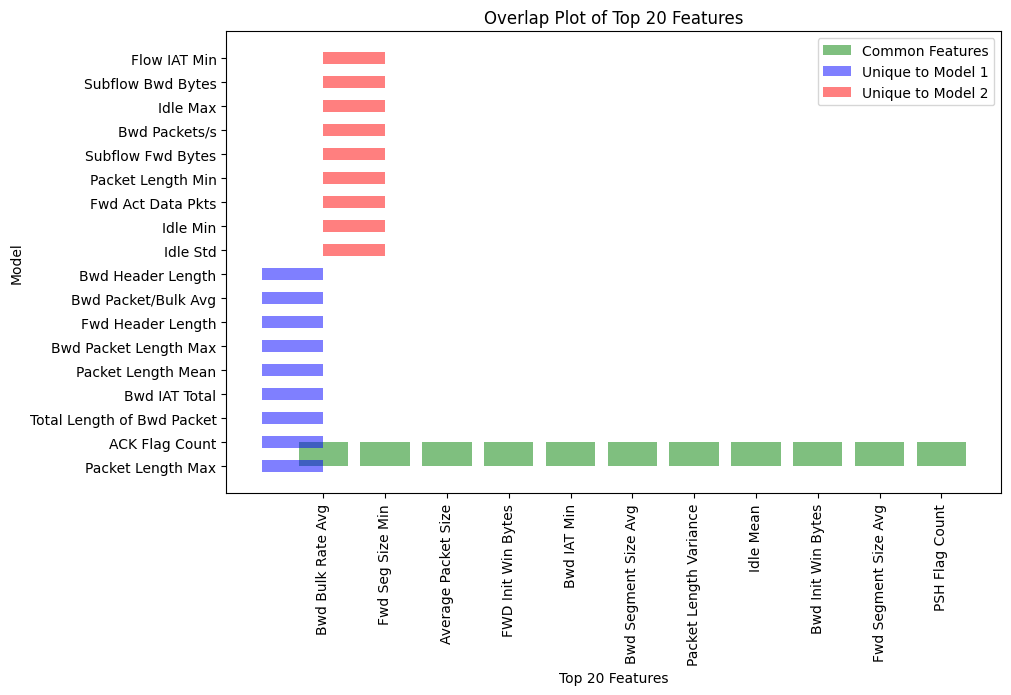

In [ ]:
import matplotlib.pyplot as plt

# define the two lists of top 20 features
#top_20_features_model_1 = ['feature_1', 'feature_2', ..., 'feature_20']
#top_20_features_model_2 = ['feature_1', 'feature_3', ..., 'feature_19']

# create a set of the top 20 features from each model
set_model_1 = set(top_k_features_cnn)
set_model_2 = set(top_k_features_lstm)

# compute the common top 20 features between the two models
common_features = list(set_model_1.intersection(set_model_2))

# compute the unique top 20 features for each model
unique_features_model_1 = list(set_model_1 - set_model_2)
unique_features_model_2 = list(set_model_2 - set_model_1)

# create the overlap plot
fig, ax = plt.subplots(figsize=(10, 6))

# plot the common features
ax.bar(common_features, height=1, color='green', alpha=0.5, label='Common Features')

# plot the unique features for model 1
ax.barh(unique_features_model_1, width=-1, height=0.5, color='blue', alpha=0.5, label='Unique to Model 1')

# plot the unique features for model 2
ax.barh(unique_features_model_2, width=1, height=0.5, color='red', alpha=0.5, label='Unique to Model 2')

# set the x and y axis labels and title
ax.set_xlabel('Top 20 Features')
ax.set_ylabel('Model')
ax.set_title('Overlap Plot of Top 20 Features')

plt.xticks(rotation=90)

# add a legend
ax.legend()

# show the plot
plt.show()


# Scatter Plot

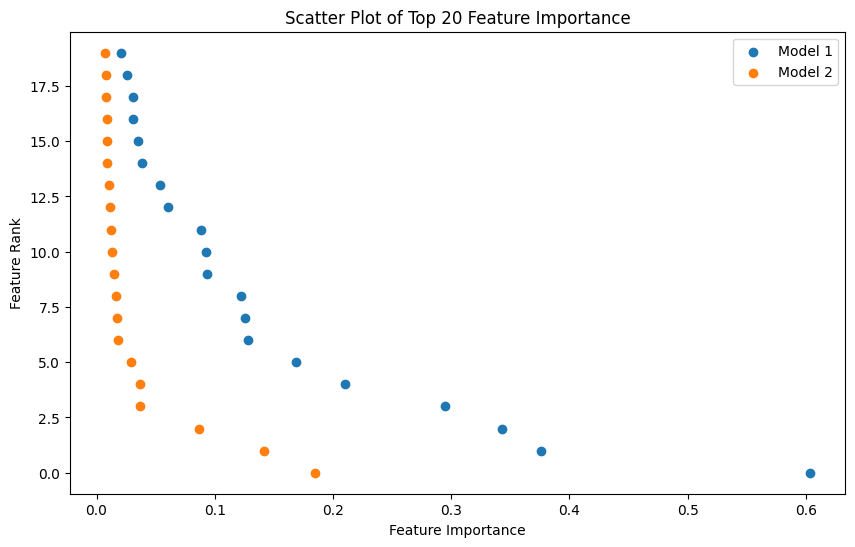

In [ ]:
import matplotlib.pyplot as plt

# define the two lists of top 20 features and their respective importance values
top_20_features_model_1 = top_k_features_cnn #['feature_1', 'feature_2', ..., 'feature_20']
importance_model_1 = feature_importances #[0.8, 0.6, ..., 0.2]
top_20_features_model_2 = top_k_features_lstm #['feature_1', 'feature_3', ..., 'feature_19']
importance_model_2 = feature_importances_lstm #[0.7, 0.5, ..., 0.1]

# create a dictionary of feature importance values for each model
importance_dict = {'Model 1': importance_model_1, 'Model 2': importance_model_2}

# create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# loop through each model and plot their top 20 features and importance values
for model, importance in importance_dict.items():
    # get the indices of the top 20 features for this model
    indices = [top_20_features_model_1.index(f) if f in top_20_features_model_1 else top_20_features_model_2.index(f) for f in top_20_features_model_1 + top_20_features_model_2][:20]
    # get the importance values for the top 20 features for this model
    values = [importance[i] for i in indices]
    # plot the feature importance values as a scatter plot
    ax.scatter(values, range(20), label=model)

# set the x and y axis labels and title
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Rank')
ax.set_title('Scatter Plot of Top 20 Feature Importance')

# add a legend
ax.legend()

# show the plot
plt.show()


# Bar Plot

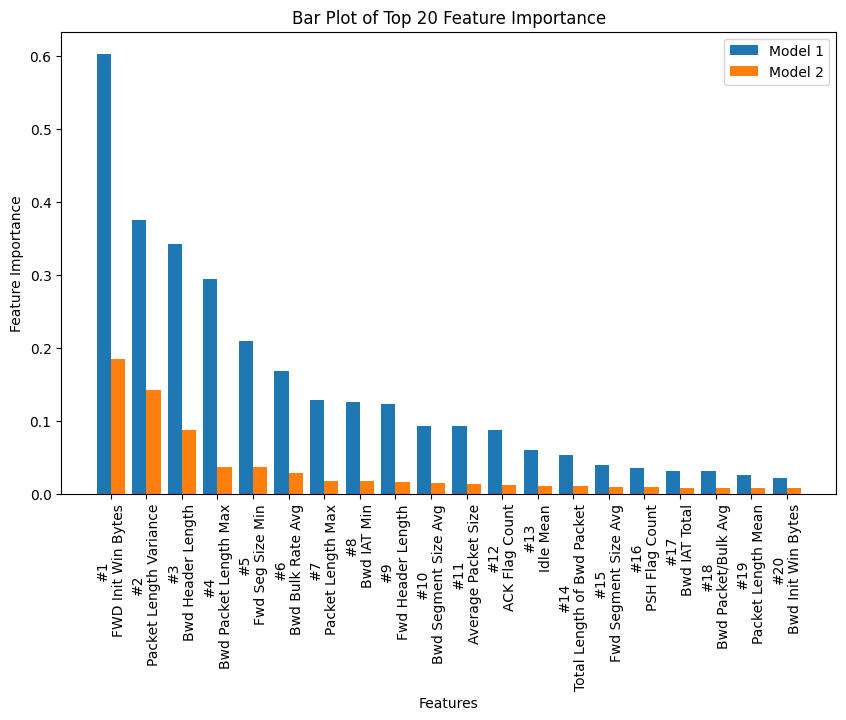

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define the two lists of top 20 features and their respective importance values
top_20_features_model_1 = top_k_features_cnn #['feature_1', 'feature_2', ..., 'feature_20']
importance_model_1 = feature_importances #[0.8, 0.6, ..., 0.2]
top_20_features_model_2 = top_k_features_lstm #['feature_1', 'feature_3', ..., 'feature_19']
importance_model_2 = feature_importances_lstm #[0.7, 0.5, ..., 0.1]

# create a dictionary of feature importance values for each model
importance_dict = {'Model 1': importance_model_1, 'Model 2': importance_model_2}

# set the width of the bars
bar_width = 0.4

# create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# loop through each model and plot their top 20 features and importance values
for i, (model, importance) in enumerate(importance_dict.items()):
    # get the indices of the top 20 features for this model
    indices = [top_20_features_model_1.index(f) if f in top_20_features_model_1 else top_20_features_model_2.index(f) for f in top_20_features_model_1 + top_20_features_model_2][:20]
    # get the importance values for the top 20 features for this model
    values = [importance[i] for i in indices]
    # calculate the x-axis positions for the bars
    x_pos = np.arange(len(values)) + i * bar_width
    # plot the feature importance values as a bar plot
    ax.bar(x_pos, values, bar_width, label=model)

# set the x and y axis labels and title
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance')
ax.set_title('Bar Plot of Top 20 Feature Importance')

# set the x-axis tick positions and labels
xtick_pos = np.arange(20)
xtick_labels = [f'#{i+1}\n{f}' for i, f in enumerate(top_20_features_model_1)]
ax.set_xticks(xtick_pos + bar_width / 2)
ax.set_xticklabels(xtick_labels, rotation='vertical')

# add a legend
ax.legend()

# show the plot
plt.show()


# Box Plot

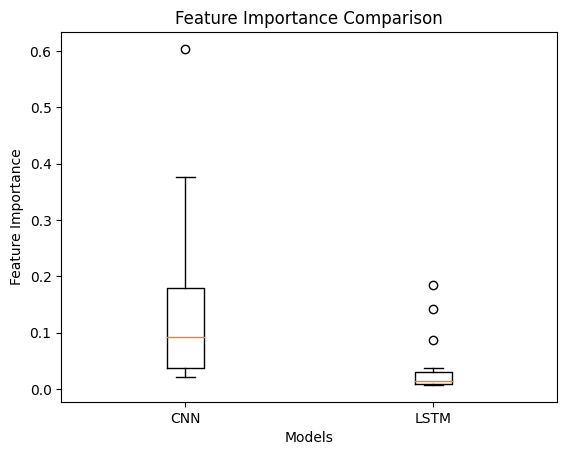

In [ ]:
import matplotlib.pyplot as plt

# sample data for two models
model1 = feature_importances# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
model2 = feature_importances_lstm# [1, 2, 2, 3, 3, 3, 4, 5, 6, 10]

# create a list of the two models' data
data = [model1, model2]

# set the labels for the x-axis
labels = ['CNN', 'LSTM']

# create the box plot
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)

# add a title and axis labels
ax.set_title('Feature Importance Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Feature Importance')

# display the plot
plt.show()
